### Importing Library

In [7]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler

### Loading Dataset

In [2]:
df = pd.read_csv('In-vehicle Coupon Recommendation-cleaned_dataset.csv')

### Standardization

In [8]:
numerical_cols = ['temperature', 'has_children', 'toCoupon_GEQ5min', 'toCoupon_GEQ15min',
                  'toCoupon_GEQ25min', 'direction_same', 'direction_opp', 'Y', 'is_alone']

bool_cols = [col for col in df.columns if col not in numerical_cols]

scaler = StandardScaler()

df_scaled_numerical = pd.DataFrame(
    scaler.fit_transform(df[numerical_cols]),
    columns=numerical_cols
)

df_final = pd.concat([df_scaled_numerical, df[bool_cols].reset_index(drop=True)], axis=1)

print(df_final.describe())

        temperature  has_children  toCoupon_GEQ5min  toCoupon_GEQ15min  \
count  1.268400e+04  1.268400e+04           12684.0       1.268400e+04   
mean   7.170409e-17  3.473167e-17               0.0      -1.568527e-17   
std    1.000039e+00  1.000039e+00               0.0       1.000039e+00   
min   -1.738659e+00 -8.407755e-01               0.0      -1.131581e+00   
25%   -4.334298e-01 -8.407755e-01               0.0      -1.131581e+00   
50%    8.717990e-01 -8.407755e-01               0.0       8.837196e-01   
75%    8.717990e-01  1.189378e+00               0.0       8.837196e-01   
max    8.717990e-01  1.189378e+00               0.0       8.837196e-01   

       toCoupon_GEQ25min  direction_same  direction_opp             Y  \
count       1.268400e+04    1.268400e+04   1.268400e+04  1.268400e+04   
mean       -1.568527e-17    1.792602e-17  -1.792602e-17 -3.137054e-17   
std         1.000039e+00    1.000039e+00   1.000039e+00  1.000039e+00   
min        -3.677455e-01   -5.229665e-01 

### Importing PCA

In [9]:
from sklearn.decomposition import PCA

### PCA Implementation and Scree Plot

Eigenvalues (Variance of each Principal Component):
[2.62010929e+00 1.82266068e+00 1.24195848e+00 9.68061873e-01
 8.05656325e-01 5.25088922e-01 4.91469785e-01 4.43941872e-01
 3.97063492e-01 3.62743863e-01 3.31801119e-01 3.04801468e-01
 2.98347204e-01 2.89232401e-01 2.76891674e-01 2.65706780e-01
 2.50410010e-01 2.34656958e-01 2.31427853e-01 2.07595696e-01
 1.97583697e-01 1.91842567e-01 1.87073278e-01 1.79134190e-01
 1.64708738e-01 1.58014338e-01 1.54612528e-01 1.48865217e-01
 1.44773225e-01 1.40279339e-01 1.29114713e-01 1.25778238e-01
 1.23448407e-01 1.20511654e-01 1.15124133e-01 1.10924906e-01
 1.07527197e-01 1.03717949e-01 9.58929063e-02 8.98987738e-02
 8.81098261e-02 8.32473281e-02 8.25068408e-02 7.73086207e-02
 7.43079461e-02 7.34545876e-02 6.86658246e-02 6.58404845e-02
 6.52776086e-02 6.26885291e-02 5.49367142e-02 5.32997183e-02
 4.93980255e-02 4.83992096e-02 4.60322333e-02 4.43981548e-02
 4.16643616e-02 4.05588788e-02 3.79195516e-02 3.47379689e-02
 2.87589965e-02 2.80204897e-02 2.

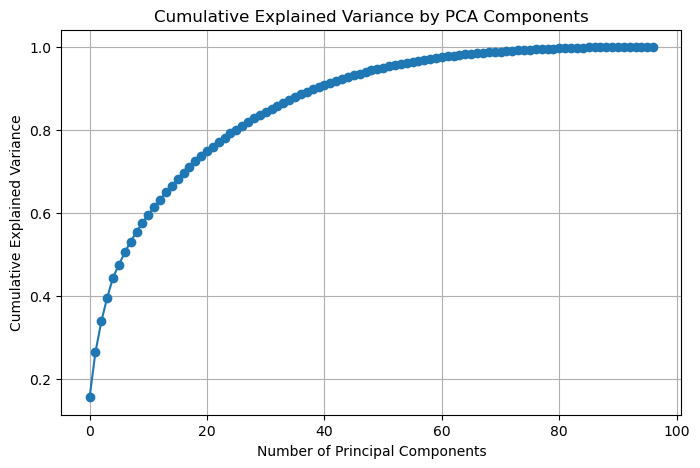

In [12]:
X = df_final.drop('Y', axis=1)  

pca = PCA()

pca.fit(X)

eigenvalues = pca.explained_variance_

explained_variance_ratio = pca.explained_variance_ratio_

cumulative_explained_variance = np.cumsum(explained_variance_ratio)

print("Eigenvalues (Variance of each Principal Component):")
print(eigenvalues)

print("\nExplained Variance Ratio (Proportion by each component):")
print(explained_variance_ratio)

print("\nCumulative Explained Variance:")
print(cumulative_explained_variance)

plt.figure(figsize=(8,5))
plt.plot(cumulative_explained_variance, marker='o')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

### Number of Components

In [13]:
components_80 = np.argmax(cumulative_explained_variance >= 0.80) + 1
components_90 = np.argmax(cumulative_explained_variance >= 0.90) + 1

print(f"\nNumber of components to explain at least 80% variance: {components_80}")
print(f"Number of components to explain at least 90% variance: {components_90}")


Number of components to explain at least 80% variance: 26
Number of components to explain at least 90% variance: 40


### Save new PCA dataset

In [15]:
X = df_final.drop('Y', axis=1)  # Drop the target column

# Step 1: Fit PCA keeping 90% variance
pca = PCA(n_components=0.90)
X_pca = pca.fit_transform(X)

# Step 2: Convert PCA output into a DataFrame
pca_columns = [f'PC{i+1}' for i in range(X_pca.shape[1])]
df_pca = pd.DataFrame(X_pca, columns=pca_columns)

# Optional: Add back the target column if you want
df_pca['Y'] = df_final['Y'].reset_index(drop=True)

# Step 3: Save to CSV
df_pca.to_csv('pca_transformed_dataset.csv', index=False)

print("PCA-transformed dataset saved as 'pca_transformed_dataset.csv'.")

PCA-transformed dataset saved as 'pca_transformed_dataset.csv'.
